In [2]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')

- Your Downloads folder is 'C:\Users\staichn\Downloads/'



In [3]:
## (Required) MAKE SURE TO CHANGE THIS VARIABLE TO MATCH YOUR LOCAL FILE NAME
RAW_FILE = r"C:\Users\staichn\Downloads/Crimes_-_2001_to_Present.csv"

if RAW_FILE == "YOUR FILEPATH HERE":
	raise Exception("You must update the RAW_FILE variable to match your local filepath.")
	
RAW_FILE

'C:\\Users\\staichn\\Downloads/Crimes_-_2001_to_Present.csv'

In [4]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

In [5]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

In [6]:
chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.00,12.00,61.00,08B,"1,165,074.00","1,875,917.00",2015,02/10/2018 03:50:01 PM,41.82,-87.67,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.00,29.00,25.00,06,"1,138,875.00","1,904,869.00",2015,02/10/2018 03:50:01 PM,41.90,-87.77,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.00,8.00,44.00,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.00,35.00,21.00,18,"1,152,037.00","1,920,384.00",2015,02/10/2018 03:50:01 PM,41.94,-87.72,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.00,28.00,25.00,08A,"1,141,706.00","1,900,086.00",2015,02/10/2018 03:50:01 PM,41.88,-87.76,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7730204,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1934,19.00,44.00,6.00,26,"1,172,497.00","1,919,410.00",2022,01/03/2023 03:46:28 PM,41.93,-87.64,"(41.934304581, -87.641484982)"
7730205,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,531,5.00,9.00,49.00,11,"1,179,966.00","1,828,818.00",2022,01/03/2023 03:46:28 PM,41.69,-87.62,"(41.685543881, -87.616812541)"
7730206,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,331,3.00,5.00,43.00,06,"1,193,181.00","1,859,005.00",2022,01/03/2023 03:46:28 PM,41.77,-87.57,"(41.768068052, -87.567452932)"
7730207,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16.00,45.00,11.00,18,"1,140,553.00","1,933,418.00",2022,01/03/2023 03:46:28 PM,41.97,-87.76,"(41.973391184, -87.758534512)"


In [7]:
# explicitly setting the format to speed up pd.to_datetime
date_format = "%m/%d/%Y %H:%M:%S %p"


### Demonstrating/testing date_format
example = chicago_full.loc[0,'Date']
display(example)
pd.to_datetime(example,format=date_format)

'09/05/2015 01:30:00 PM'

Timestamp('2015-09-05 01:30:00')

In [8]:

# this cell can take up to 1 min to run
chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full = chicago_full.set_index('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Datetime,,,,,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1311732,G001071,01/01/2001 01:00:00 PM,013XX N BOSWORTH AV,2851,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.00,NaN,NaN,26,"1,165,804.00","1,908,952.00",2001,08/17/2015 03:03:40 PM,41.91,-87.67,"(41.905752775, -87.666380466)"
2001-01-01 01:00:00,3769790,HL141452,01/01/2001 01:00:00 PM,121XX S LOWE AVE,0842,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.00,34.00,53.00,06,"1,174,215.00","1,824,262.00",2001,03/31/2006 10:03:38 PM,41.67,-87.64,"(41.673170821, -87.638000169)"
2001-01-01 01:00:00,1317380,G003733,01/01/2001 01:00:00 PM,047XX S ROCKWELL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,911,9.00,NaN,NaN,14,"1,159,873.00","1,873,101.00",2001,08/17/2015 03:03:40 PM,41.81,-87.69,"(41.807498413, -87.68915513)"
2001-01-01 01:00:00,1324743,G001083,01/01/2001 01:00:00 PM,005XX E 63 ST,1626,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.00,NaN,NaN,19,"1,180,999.00","1,863,398.00",2001,08/17/2015 03:03:40 PM,41.78,-87.61,"(41.780411868, -87.611970027)"
2001-01-01 01:00:00,1427622,G150373,01/01/2001 01:00:00 PM,045XX W SCHUBERT AV,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.00,NaN,NaN,26,"1,145,750.00","1,917,534.00",2001,08/17/2015 03:03:40 PM,41.93,-87.74,"(41.929706879, -87.73982819)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01 12:50:00,12969478,JG136577,02/01/2023 12:50:00 AM,054XX S INDIANA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,231,2.00,3.00,40.00,08B,"1,178,522.00","1,869,060.00",2023,02/08/2023 03:49:45 PM,41.80,-87.62,"(41.796005609, -87.620879042)"
2023-02-01 12:53:00,12970000,JG137096,02/01/2023 12:53:00 PM,055XX W SCHOOL ST,0496,BATTERY,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...,RESIDENCE,False,True,1633,16.00,30.00,15.00,04B,"1,138,888.00","1,921,393.00",2023,02/08/2023 03:49:45 PM,41.94,-87.76,"(41.940423951, -87.764950486)"
2023-02-01 12:53:00,12969899,JG137095,02/01/2023 12:53:00 PM,049XX W FERDINAND ST,1822,NARCOTICS,MANUFACTURE / DELIVER - CANNABIS OVER 10 GRAMS,ALLEY,True,False,1532,15.00,37.00,25.00,18,"1,143,354.00","1,902,879.00",2023,02/08/2023 03:49:45 PM,41.89,-87.75,"(41.889537142, -87.74899981)"


In [9]:
(chicago_full.isna().sum()/len(chicago_full)).round(2)

ID                     0.00
Case Number            0.00
Date                   0.00
Block                  0.00
IUCR                   0.00
Primary Type           0.00
Description            0.00
Location Description   0.00
Arrest                 0.00
Domestic               0.00
Beat                   0.00
District               0.00
Ward                   0.08
Community Area         0.08
FBI Code               0.00
X Coordinate           0.01
Y Coordinate           0.01
Year                   0.00
Updated On             0.00
Latitude               0.01
Longitude              0.01
Location               0.01
dtype: float64

## Separate the Full Dataset by Years

In [10]:
# save the years for every crime
chicago_full["Year"] = chicago_full.index.year
chicago_full["Year"] = chicago_full["Year"].astype(str)
chicago_full["Year"].value_counts()

2002    486799
2001    485869
2003    475979
2004    469418
2005    453767
2006    448173
2007    437081
2008    427160
2009    392816
2010    370490
2011    351958
2012    336255
2013    307453
2014    275722
2016    269770
2017    269037
2018    268734
2015    264732
2019    261197
2022    236717
2020    212019
2021    208385
2023     20678
Name: Year, dtype: int64

In [11]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [12]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols).sort_index()#.reset_index()
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.00,NaN,2001,41.91,-87.67
2001-01-01 01:00:00,3769790,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.00,34.00,2001,41.67,-87.64
2001-01-01 01:00:00,1317380,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,911,9.00,NaN,2001,41.81,-87.69
2001-01-01 01:00:00,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.00,NaN,2001,41.78,-87.61
2001-01-01 01:00:00,1427622,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.00,NaN,2001,41.93,-87.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01 12:50:00,12969478,02/01/2023 12:50:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,231,2.00,3.00,2023,41.80,-87.62
2023-02-01 12:53:00,12970000,02/01/2023 12:53:00 PM,BATTERY,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...,RESIDENCE,False,True,1633,16.00,30.00,2023,41.94,-87.76
2023-02-01 12:53:00,12969899,02/01/2023 12:53:00 PM,NARCOTICS,MANUFACTURE / DELIVER - CANNABIS OVER 10 GRAMS,ALLEY,True,False,1532,15.00,37.00,2023,41.89,-87.75


In [13]:
chicago_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7730209 entries, 2001-01-01 01:00:00 to 2023-02-01 12:57:00
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Year                  object 
 11  Latitude              float64
 12  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(5)
memory usage: 722.5+ MB


In [14]:
chicago_final.memory_usage(deep=True).astype(float)

Index                   61,841,672.00
ID                      61,841,672.00
Date                   610,686,511.00
Primary Type           518,144,156.00
Description            565,737,865.00
Location Description   526,854,697.00
Arrest                   7,730,209.00
Domestic                 7,730,209.00
Beat                    61,841,672.00
District                61,841,672.00
Ward                    61,841,672.00
Year                   471,542,749.00
Latitude                61,841,672.00
Longitude               61,841,672.00
dtype: float64

In [15]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [16]:
FINAL_DROP = ['Datetime','Year']#,'Location Description']

In [17]:
## set save location 
OUTPUT_FOLDER = 'C:/Users/staichn/OneDrive - Coherent, Inc/Documents/GitHub/Chicago Crime Data/Data/'

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[ year]
    temp_df = temp_df.reset_index(drop=False)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to C:/Users/staichn/OneDrive - Coherent, Inc/Documents/GitHub/Chicago Crime Data/Data/
- Succesfully saved C:/Users/staichn/OneDrive - Coherent, Inc/Documents/GitHub/Chicago Crime Data/Data/Chicago-Crime_2001.csv
- Succesfully saved C:/Users/staichn/OneDrive - Coherent, Inc/Documents/GitHub/Chicago Crime Data/Data/Chicago-Crime_2002.csv
- Succesfully saved C:/Users/staichn/OneDrive - Coherent, Inc/Documents/GitHub/Chicago Crime Data/Data/Chicago-Crime_2003.csv
- Succesfully saved C:/Users/staichn/OneDrive - Coherent, Inc/Documents/GitHub/Chicago Crime Data/Data/Chicago-Crime_2004.csv
- Succesfully saved C:/Users/staichn/OneDrive - Coherent, Inc/Documents/GitHub/Chicago Crime Data/Data/Chicago-Crime_2005.csv
- Succesfully saved C:/Users/staichn/OneDrive - Coherent, Inc/Documents/GitHub/Chicago Crime Data/Data/Chicago-Crime_2006.csv
- Succesfully saved C:/Users/staichn/OneDrive - Coherent, Inc/Documents/GitHub/Chicago Crime Data/Data/Chicago-Crime_2007.csv
- Succesfully

In [18]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['C:/Users/staichn/OneDrive - Coherent, Inc/Documents/GitHub/Chicago Crime Data/Data\\Chicago-Crime_2001.csv',
 'C:/Users/staichn/OneDrive - Coherent, Inc/Documents/GitHub/Chicago Crime Data/Data\\Chicago-Crime_2002.csv',
 'C:/Users/staichn/OneDrive - Coherent, Inc/Documents/GitHub/Chicago Crime Data/Data\\Chicago-Crime_2003.csv',
 'C:/Users/staichn/OneDrive - Coherent, Inc/Documents/GitHub/Chicago Crime Data/Data\\Chicago-Crime_2004.csv',
 'C:/Users/staichn/OneDrive - Coherent, Inc/Documents/GitHub/Chicago Crime Data/Data\\Chicago-Crime_2005.csv',
 'C:/Users/staichn/OneDrive - Coherent, Inc/Documents/GitHub/Chicago Crime Data/Data\\Chicago-Crime_2006.csv',
 'C:/Users/staichn/OneDrive - Coherent, Inc/Documents/GitHub/Chicago Crime Data/Data\\Chicago-Crime_2007.csv',
 'C:/Users/staichn/OneDrive - Coherent, Inc/Documents/GitHub/Chicago Crime Data/Data\\Chicago-Crime_2008.csv',
 'C:/Users/staichn/OneDrive - Coherent, Inc/Documents/GitHub/Chicago Crime Data/Data\\Chicago-Crime_2009.csv',
 

In [19]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 02/09/2023
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 02/09/2023
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



## Confirmation
* Follow the example usage above to test if your files were created successfully.

In [20]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.00,NaN,41.91,-87.67
1,3769790,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.00,34.00,41.67,-87.64
2,1317380,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,911,9.00,NaN,41.81,-87.69
3,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.00,NaN,41.78,-87.61
4,1427622,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.00,NaN,41.93,-87.74
...,...,...,...,...,...,...,...,...,...,...,...,...
20673,12969478,02/01/2023 12:50:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,231,2.00,3.00,41.80,-87.62
20674,12970000,02/01/2023 12:53:00 PM,BATTERY,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...,RESIDENCE,False,True,1633,16.00,30.00,41.94,-87.76
20675,12969899,02/01/2023 12:53:00 PM,NARCOTICS,MANUFACTURE / DELIVER - CANNABIS OVER 10 GRAMS,ALLEY,True,False,1532,15.00,37.00,41.89,-87.75
20676,12971229,02/01/2023 12:54:00 PM,THEFT,$500 AND UNDER,RESIDENCE - PORCH / HALLWAY,False,False,212,2.00,3.00,41.83,-87.62


In [21]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    485869
2002    486799
2003    475979
2004    469418
2005    453767
2006    448173
2007    437081
2008    427160
2009    392816
2010    370490
2011    351958
2012    336255
2013    307453
2014    275722
2015    264732
2016    269770
2017    269037
2018    268734
2019    261197
2020    212019
2021    208385
2022    236717
2023     20678
Name: Date, dtype: int64

In [22]:
# File is too large to to push to GitHub...  ## set save location 
# OUTPUT_FOLDER = 'C:/Users/staichn/OneDrive - Coherent, Inc/Documents/GitHub/Chicago Crime Data/Data/'

# os.makedirs(OUTPUT_FOLDER, exist_ok=True)
# print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")

# fname_temp = f"{OUTPUT_FOLDER}Starting_Data.csv"#.gz
    
# df.to_csv(fname_temp,index=False)

# print(f"- Succesfully saved {fname_temp}")

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = (12,3)


In [24]:
def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({
                        'dtype':df.dtypes,
                        '# null': df.isna().sum(),
                        'null (%)': df.isna().sum()/len(df)*100,
                        'nunique':df.nunique(),
                        "min":df.min(),
                        'max':df.max()
             })
    report.index.name='Column'
    return report.reset_index()
summarize_df(df)

C:\Users\staichn\AppData\Local\Temp\ipykernel_52100\861501889.py:8: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  "min":df.min(),
C:\Users\staichn\AppData\Local\Temp\ipykernel_52100\861501889.py:9: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'max':df.max()


,Column,dtype,# null,null (%),nunique,min,max
0,Arrest,bool,0,0.00,2,False,True
1,Beat,int64,0,0.00,304,111,2535
2,Date,object,0,0.00,3181543,01/01/2001 01:00:00 AM,12/31/2022 12:59:00 PM
3,Description,object,0,0.00,543,$300 AND UNDER,WIREROOM/SPORTS
4,District,float64,47,0.00,24,1.00,31.00
5,Domestic,bool,0,0.00,2,False,True
6,ID,int64,0,0.00,7730209,634,12976545
7,Latitude,float64,84515,1.09,887828,36.62,42.02
8,Location Description,object,10023,0.13,215,NaN,NaN
9,Longitude,float64,84515,1.09,887241,-91.69,-87.52


In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0       2001-01-01 13:00:00
1       2001-01-01 13:00:00
2       2001-01-01 13:00:00
3       2001-01-01 13:00:00
4       2001-01-01 13:00:00
                ...        
20673   2023-02-01 00:50:00
20674   2023-02-01 12:53:00
20675   2023-02-01 12:53:00
20676   2023-02-01 12:54:00
20677   2023-02-01 12:57:00
Name: Date, Length: 7730209, dtype: datetime64[ns]

In [26]:
chrono_df = df.set_index('Date')
chrono_df.info()
chrono_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7730209 entries, 2001-01-01 13:00:00 to 2023-02-01 12:57:00
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 604.5+ MB


,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 13:00:00,1311732,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.00,NaN,41.91,-87.67
2001-01-01 13:00:00,3769790,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.00,34.00,41.67,-87.64
2001-01-01 13:00:00,1317380,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,911,9.00,NaN,41.81,-87.69
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.00,NaN,41.78,-87.61
2001-01-01 13:00:00,1427622,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.00,NaN,41.93,-87.74
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01 00:50:00,12969478,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,231,2.00,3.00,41.80,-87.62
2023-02-01 12:53:00,12970000,BATTERY,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...,RESIDENCE,False,True,1633,16.00,30.00,41.94,-87.76
2023-02-01 12:53:00,12969899,NARCOTICS,MANUFACTURE / DELIVER - CANNABIS OVER 10 GRAMS,ALLEY,True,False,1532,15.00,37.00,41.89,-87.75


In [27]:
chrono_df.index

DatetimeIndex(['2001-01-01 13:00:00', '2001-01-01 13:00:00',
               '2001-01-01 13:00:00', '2001-01-01 13:00:00',
               '2001-01-01 13:00:00', '2001-01-01 13:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               ...
               '2023-02-01 12:37:00', '2023-02-01 12:40:00',
               '2023-02-01 12:41:00', '2023-02-01 00:43:00',
               '2023-02-01 12:45:00', '2023-02-01 00:50:00',
               '2023-02-01 12:53:00', '2023-02-01 12:53:00',
               '2023-02-01 12:54:00', '2023-02-01 12:57:00'],
              dtype='datetime64[ns]', name='Date', length=7730209, freq=None)

In [28]:
#Quick Function for EDA analysis (proper EDA should still be conducted)

def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({
        'dtype':df.dtypes,
        '# null': df.isna().sum(),
        'null %': df.isna().sum()/len(df)*100,
        'nunique': df.nunique(),
        'min':df.min(),
        'max':df.max()        
    })
    report.index.name='Column'
    return report.reset_index()
summarize_df(chrono_df)

C:\Users\staichn\AppData\Local\Temp\ipykernel_52100\3464280240.py:10: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'min':df.min(),
C:\Users\staichn\AppData\Local\Temp\ipykernel_52100\3464280240.py:11: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'max':df.max()


,Column,dtype,# null,null %,nunique,min,max
0,Arrest,bool,0,0.00,2,False,True
1,Beat,int64,0,0.00,304,111,2535
2,Description,object,0,0.00,543,$300 AND UNDER,WIREROOM/SPORTS
3,District,float64,47,0.00,24,1.00,31.00
4,Domestic,bool,0,0.00,2,False,True
5,ID,int64,0,0.00,7730209,634,12976545
6,Latitude,float64,84515,1.09,887828,36.62,42.02
7,Location Description,object,10023,0.13,215,NaN,NaN
8,Longitude,float64,84515,1.09,887241,-91.69,-87.52
9,Primary Type,object,0,0.00,36,ARSON,WEAPONS VIOLATION


# 1) Comparing Police Districts:

* Which district has the most crimes? Which has the least?

In [29]:
district_df = chrono_df.groupby('District').nunique()
district_df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,Latitude,Longitude
District,,,,,,,,,,
1.00,311703,33,422,155,2,2,37,14,17045,17045
2.00,365727,35,438,161,2,2,46,16,35147,35142
3.00,392062,34,444,160,2,2,36,10,31402,31423
4.00,438849,35,447,153,2,2,27,10,51260,51212
5.00,342882,35,431,155,2,2,26,14,41038,41041
6.00,451823,33,444,152,2,2,39,13,42112,42128
7.00,448029,32,435,154,2,2,36,13,40245,40246
8.00,519631,33,446,159,2,2,37,18,76881,76884
9.00,378014,34,440,147,2,2,47,17,52741,52759


In [30]:
dist_hist = district_df.sort_values('ID', ascending = False)
dist_hist

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,Latitude,Longitude
District,,,,,,,,,,
8.00,519631,33,446,159,2,2,37,18,76881,76884
11.00,496623,35,466,156,2,2,37,11,39859,39870
6.00,451823,33,444,152,2,2,39,13,42112,42128
7.00,448029,32,435,154,2,2,36,13,40245,40246
25.00,439998,33,451,142,2,2,38,20,58581,58601
4.00,438849,35,447,153,2,2,27,10,51260,51212
3.00,392062,34,444,160,2,2,36,10,31402,31423
12.00,382361,33,454,153,2,2,64,25,49736,49732
9.00,378014,34,440,147,2,2,47,17,52741,52759


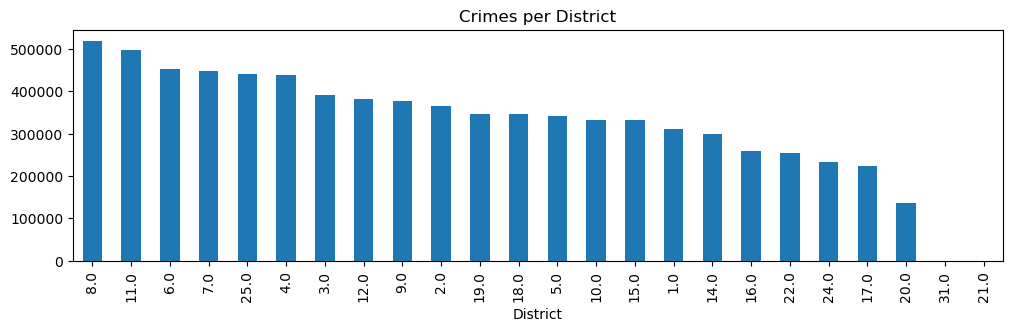

In [31]:
ax = dist_hist['ID'].plot.bar(title = 'Crimes per District')

There is an interesting distribution of crime across Chicago when looking at the total dataset from 2001 to 2023.  

The District with the highest number of crimes in that period is the 8th District with 519,631 crimes. 

The district with the least number of crimes is the 21st District with 4.  

This last data point seems suspect statistically, as does the low number of crimes reported in the 31st District (232 crimes since 2001). 

Considering the overall crime volumes throughout the city over the period, it would be unlikely for two districts to report such low crime levels. 

It seems that the district with the most reliable numbers relative to the rest of the city for the lowest crime volume is the 20th District with 136,505 crimes. 

# 2) Crimes Across the Years:

* Is the total number of crimes increasing or decreasing across the years?

* Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [32]:
annual_df = chrono_df.resample('Y').count()
#annual_df.value_count('id')
annual_df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-12-31,485869,485869,485869,485864,485869,485869,485869,485869,4285,482877,482877
2002-12-31,486799,486799,486799,486794,486799,486799,486799,486799,353689,471529,471529
2003-12-31,475979,475979,475979,475975,475979,475979,475979,475979,475960,472041,472041
2004-12-31,469418,469418,469418,469403,469418,469418,469418,469416,469396,467204,467204
2005-12-31,453767,453767,453767,453749,453767,453767,453767,453766,453766,449920,449920
2006-12-31,448173,448173,448173,448155,448173,448173,448173,448172,448170,445549,445549
2007-12-31,437081,437081,437081,437058,437081,437081,437081,437079,437076,435693,435693
2008-12-31,427160,427160,427160,427119,427160,427160,427160,427120,427156,420037,420037
2009-12-31,392816,392816,392816,392764,392816,392816,392816,392816,392813,386051,386051


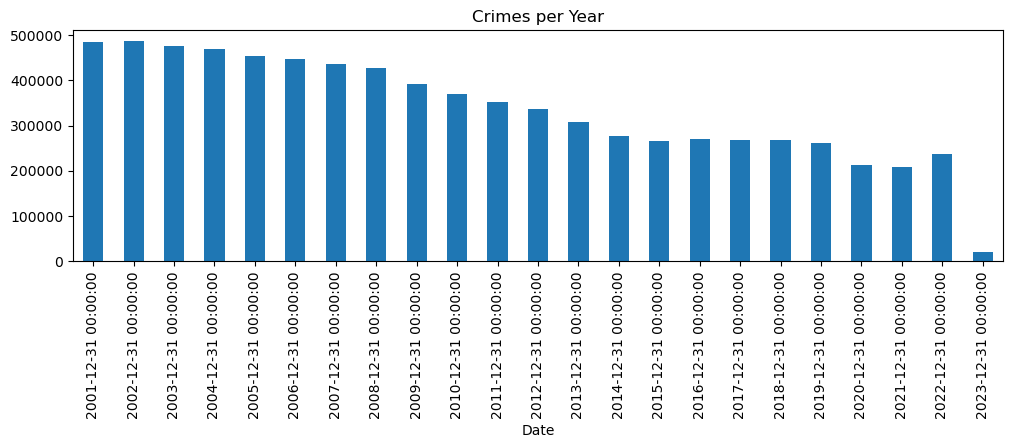

In [33]:
ax = annual_df['ID'].plot.bar(title = 'Crimes per Year')

In [34]:
indiv_crimes = chrono_df.groupby('Primary Type').resample('Y').count()
indiv_crimes

ID  Primary Type  Description  \
Primary Type      Date                                          
ARSON             2001-12-31  1011          1011         1011   
                  2002-12-31  1032          1032         1032   
                  2003-12-31   955           955          955   
                  2004-12-31   778           778          778   
                  2005-12-31   691           691          691   
...                            ...           ...          ...   
WEAPONS VIOLATION 2019-12-31  6339          6339         6339   
                  2020-12-31  8431          8431         8431   
                  2021-12-31  8978          8978         8978   
                  2022-12-31  8726          8726         8726   
                  2023-12-31   756           756          756   

                              Location Description  Arrest  Domestic  Beat  \
Primary Type      Date                                                       
ARSON             2001-12-31                  1011    1011      1011  1011   
                  2002-12-31                  1032    1032      1032  1032   
                  2003-12-31                   955     955       955   955   
                  2004-12-31                   778     778       778   778   
                  2005-12-31                   691     691       691   691   
...                                            ...     ...       ...   ...   
WEAPONS VIOLATION 2019-12-31                  6339    6339      6339  6339   
                  2020-12-31                  8431    8431      8431  8431   
                  2021-12-31                  8978    8978      8978  8978   
                  2022-12-31                  8726    8726      8726  8726   
                  2023-12-31                   756     756       756   756   

                              District  Ward  Latitude  Longitude  
Primary Type      Date                                             
ARSON             2001-12-31      1011     4      1005       1005  
                  2002-12-31      1032   723       978        978  
                  2003-12-31       955   955       953        953  
                  2004-12-31       778   778       774        774  
                  2005-12-31       691   691       688        688  
...                                ...   ...       ...        ...  
WEAPONS VIOLATION 2019-12-31      6339  6338      6338       6338  
                  2020-12-31      8431  8431      8416       8416  
                  2021-12-31      8978  8978      8945       8945  
                  2022-12-31      8726  8725      8698       8698  
                  2023-12-31       756   756       756        756  

[750 rows x 11 columns]

In [35]:
crimes_df = indiv_crimes.drop(columns=['ID', 'Description',
                                       'Location Description', 'Arrest', 
                                       'Domestic', 'Beat', 'District', 'Ward',
                                       'Latitude', 'Longitude'])
crimes_unstacked = crimes_df.unstack(level=0)
crimes_unstacked.name = "Crimes over Time"
crimes_unstacked

Primary Type                                \
Primary Type        ARSON   ASSAULT   BATTERY  BURGLARY   
Date                                                      
2001-12-31       1,011.00 31,384.00 93,459.00 26,014.00   
2002-12-31       1,032.00 31,523.00 94,153.00 25,623.00   
2003-12-31         955.00 29,477.00 88,379.00 25,156.00   
2004-12-31         778.00 28,850.00 87,136.00 24,564.00   
2005-12-31         691.00 27,066.00 83,964.00 25,503.00   
2006-12-31         726.00 25,945.00 80,666.00 24,324.00   
2007-12-31         712.00 26,313.00 79,593.00 24,858.00   
2008-12-31         644.00 25,449.00 75,926.00 26,218.00   
2009-12-31         616.00 22,861.00 68,460.00 26,767.00   
2010-12-31         522.00 21,537.00 65,402.00 26,422.00   
2011-12-31         504.00 20,411.00 60,459.00 26,620.00   
2012-12-31         469.00 19,899.00 59,135.00 22,845.00   
2013-12-31         364.00 17,972.00 54,005.00 17,895.00   
2014-12-31         397.00 16,903.00 49,450.00 14,569.00   
2015-12-31         453.00 17,048.00 48,923.00 13,184.00   
2016-12-31         516.00 18,742.00 50,298.00 14,289.00   
2017-12-31         444.00 19,306.00 49,239.00 13,001.00   
2018-12-31         373.00 20,406.00 49,828.00 11,746.00   
2019-12-31         376.00 20,619.00 49,512.00  9,639.00   
2020-12-31         589.00 18,254.00 41,509.00  8,757.00   
2021-12-31         527.00 20,338.00 40,450.00  6,658.00   
2022-12-31         424.00 20,753.00 40,838.00  7,582.00   
2023-12-31          44.00  1,713.00  3,240.00    677.00   

                                                                    \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Date                                                                 
2001-12-31                                1.00            1,779.00   
2002-12-31                                0.00            1,807.00   
2003-12-31                                0.00            1,572.00   
2004-12-31                                0.00            1,545.00   
2005-12-31                                0.00            1,526.00   
2006-12-31                                0.00            1,440.00   
2007-12-31                                0.00            1,508.00   
2008-12-31                                0.00            1,518.00   
2009-12-31                                0.00            1,406.00   
2010-12-31                                0.00            1,341.00   
2011-12-31                                0.00            1,464.00   
2012-12-31                                0.00            1,399.00   
2013-12-31                                0.00            1,277.00   
2014-12-31                               15.00            1,318.00   
2015-12-31                               34.00            1,355.00   
2016-12-31                               36.00            1,502.00   
2017-12-31                               69.00            1,513.00   
2018-12-31                              149.00            1,407.00   
2019-12-31                              217.00              914.00   
2020-12-31                              148.00               75.00   
2021-12-31                              173.00                 NaN   
2022-12-31                              177.00                 NaN   
2023-12-31                               21.00                 NaN   

                                                                        \
Primary Type CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Date                                                                     
2001-12-31         55,857.00                   30.00         13,241.00   
2002-12-31         55,941.00                   27.00         13,880.00   
2003-12-31         55,011.00                   39.00         14,807.00   
2004-12-31         53,164.00                   34.00         15,913.00   
2005-12-31         54,548.00                   31.00         16,655.00   
2006-12-31         57,124.00                   45.00         14,5

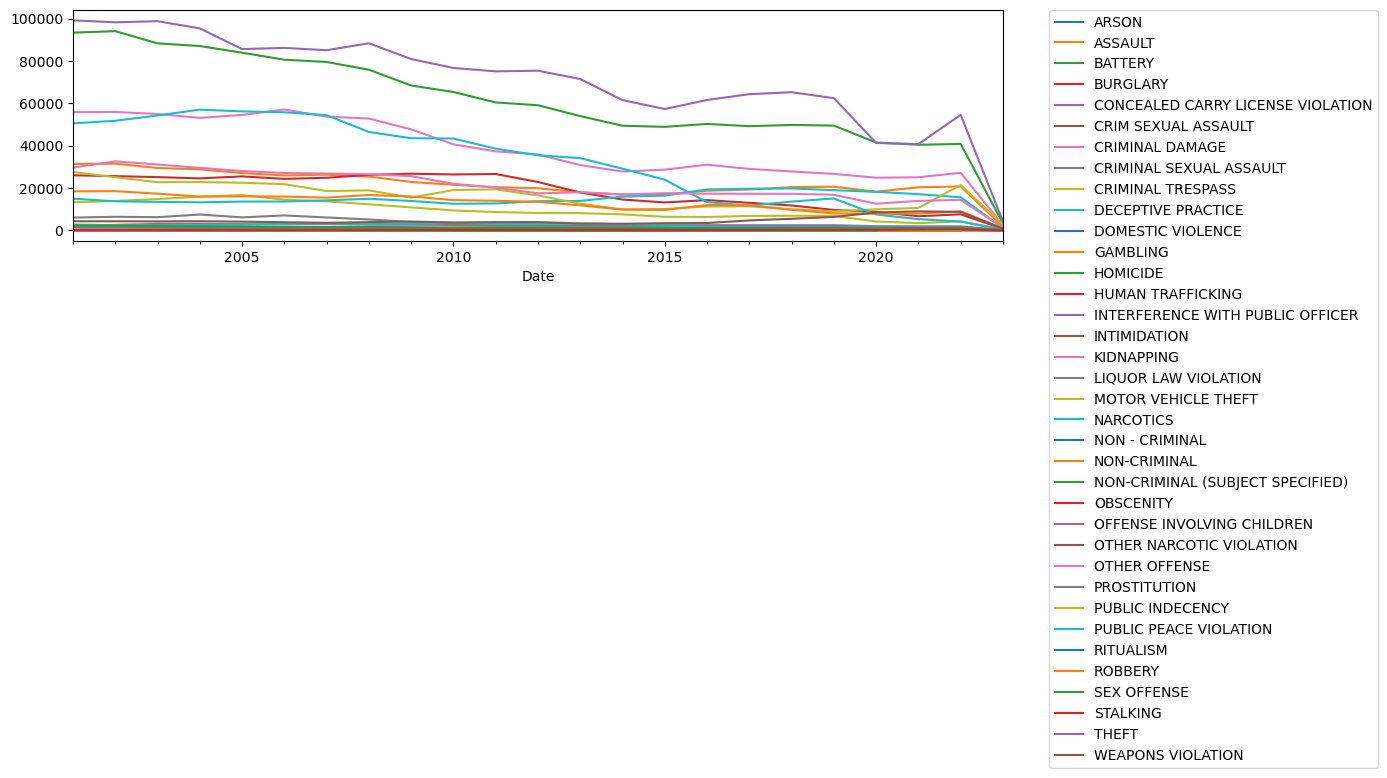

In [36]:
ax = crimes_unstacked['Primary Type'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [37]:
def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)

C:\Users\staichn\AppData\Local\Temp\ipykernel_52100\3530166827.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),
C:\Users\staichn\AppData\Local\Temp\ipykernel_52100\3530166827.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),


(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: >)

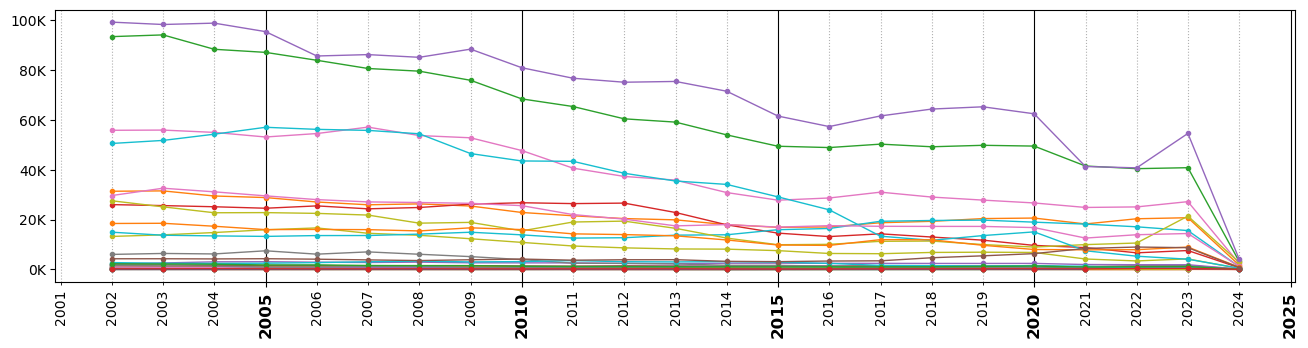

In [38]:
def plot_dates(ts,figsize=(16,4),xtick_fontsize='large', xtick_fontweight='bold',
               title= None):## Make the fig and axis first

    if title is None:
        title = ts.name
    # plot the time series with pandas
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(ts.index, ts.values, marker='.', lw=1);
    #max_temp_yr.plot(ax=ax,title=title, style='.-');
   
    # create formatting to show prices in Thousands
    ax.yaxis.set_major_formatter(fmt_thous)
    
    ## creating our tick locators and formatters
    ## for minor month ticks
    # create the locator to place ticks every year.
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    ## for major year ticks
    loc_5year = mdates.YearLocator(5)
    fmt_5year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
#     ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontsize=xtick_fontsize, 
                       fontweight=xtick_fontweight) 
    
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_year)
    ax.xaxis.set_minor_formatter(fmt_year)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_5year)
    ax.xaxis.set_major_formatter(fmt_5year)
    ## Making major/minor gridlines visually distinct
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    
     ## Change the font of the major ticks to stand out
#     ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontsize=xtick_fontsize, 
                       fontweight=xtick_fontweight) 
    
 #   plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    fig.autofmt_xdate(which='minor',rotation=90,ha='center')
    return fig,ax

plot_dates(crimes_unstacked)

In [39]:
crime_diff = crimes_unstacked.diff()
crime_diff

Primary Type                                  \
Primary Type        ARSON    ASSAULT    BATTERY  BURGLARY   
Date                                                        
2001-12-31            NaN        NaN        NaN       NaN   
2002-12-31          21.00     139.00     694.00   -391.00   
2003-12-31         -77.00  -2,046.00  -5,774.00   -467.00   
2004-12-31        -177.00    -627.00  -1,243.00   -592.00   
2005-12-31         -87.00  -1,784.00  -3,172.00    939.00   
2006-12-31          35.00  -1,121.00  -3,298.00 -1,179.00   
2007-12-31         -14.00     368.00  -1,073.00    534.00   
2008-12-31         -68.00    -864.00  -3,667.00  1,360.00   
2009-12-31         -28.00  -2,588.00  -7,466.00    549.00   
2010-12-31         -94.00  -1,324.00  -3,058.00   -345.00   
2011-12-31         -18.00  -1,126.00  -4,943.00    198.00   
2012-12-31         -35.00    -512.00  -1,324.00 -3,775.00   
2013-12-31        -105.00  -1,927.00  -5,130.00 -4,950.00   
2014-12-31          33.00  -1,069.00  -4,555.00 -3,326.00   
2015-12-31          56.00     145.00    -527.00 -1,385.00   
2016-12-31          63.00   1,694.00   1,375.00  1,105.00   
2017-12-31         -72.00     564.00  -1,059.00 -1,288.00   
2018-12-31         -71.00   1,100.00     589.00 -1,255.00   
2019-12-31           3.00     213.00    -316.00 -2,107.00   
2020-12-31         213.00  -2,365.00  -8,003.00   -882.00   
2021-12-31         -62.00   2,084.00  -1,059.00 -2,099.00   
2022-12-31        -103.00     415.00     388.00    924.00   
2023-12-31        -380.00 -19,040.00 -37,598.00 -6,905.00   

                                                                    \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Date                                                                 
2001-12-31                                 NaN                 NaN   
2002-12-31                               -1.00               28.00   
2003-12-31                                0.00             -235.00   
2004-12-31                                0.00              -27.00   
2005-12-31                                0.00              -19.00   
2006-12-31                                0.00              -86.00   
2007-12-31                                0.00               68.00   
2008-12-31                                0.00               10.00   
2009-12-31                                0.00             -112.00   
2010-12-31                                0.00              -65.00   
2011-12-31                                0.00              123.00   
2012-12-31                                0.00              -65.00   
2013-12-31                                0.00             -122.00   
2014-12-31                               15.00               41.00   
2015-12-31                               19.00               37.00   
2016-12-31                                2.00              147.00   
2017-12-31                               33.00               11.00   
2018-12-31                               80.00             -106.00   
2019-12-31                               68.00             -493.00   
2020-12-31                              -69.00             -839.00   
2021-12-31                               25.00                 NaN   
2022-12-31                                4.00                 NaN   
2023-12-31                             -156.00                 NaN   

                                                                        \
Primary Type CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Date                                                                     
2001-12-31               NaN                     NaN               NaN   
2002-12-31             84.00                   -3.00            639.00   
2003-12-31           -930.00                   12.00            927.00   
2004-12-31         -1,847.00                   -5.00          1,106.00   
2005-12-31          1,384.00                   -3.00            742.00   
2006-12-31   

In [40]:
crime_delta = crime_diff.sum()
crime_delta

              Primary Type                     
Primary Type  ARSON                                  -967.00
              ASSAULT                             -29,671.00
              BATTERY                             -90,219.00
              BURGLARY                            -25,337.00
              CONCEALED CARRY LICENSE VIOLATION        20.00
              CRIM SEXUAL ASSAULT                  -1,704.00
              CRIMINAL DAMAGE                     -53,449.00
              CRIMINAL SEXUAL ASSAULT                  82.00
              CRIMINAL TRESPASS                   -12,851.00
              DECEPTIVE PRACTICE                  -13,824.00
              DOMESTIC VIOLENCE                         0.00
              GAMBLING                               -933.00
              HOMICIDE                               -621.00
              HUMAN TRAFFICKING                        17.00
              INTERFERENCE WITH PUBLIC OFFICER       -372.00
              INTIMIDATION           

In [41]:
top_drops = crime_delta.sort_values()
top_drops

              Primary Type                     
Primary Type  THEFT                               -95,103.00
              BATTERY                             -90,219.00
              CRIMINAL DAMAGE                     -53,449.00
              NARCOTICS                           -50,079.00
              ASSAULT                             -29,671.00
              OTHER OFFENSE                       -28,439.00
              BURGLARY                            -25,337.00
              MOTOR VEHICLE THEFT                 -24,686.00
              ROBBERY                             -17,532.00
              DECEPTIVE PRACTICE                  -13,824.00
              CRIMINAL TRESPASS                   -12,851.00
              PROSTITUTION                         -5,963.00
              WEAPONS VIOLATION                    -3,520.00
              PUBLIC PEACE VIOLATION               -2,698.00
              SEX OFFENSE                          -2,165.00
              OFFENSE INVOLVING CHILD

In [42]:
top_drop10 = top_drops.nsmallest(10)
top_drop10

              Primary Type       
Primary Type  THEFT                 -95,103.00
              BATTERY               -90,219.00
              CRIMINAL DAMAGE       -53,449.00
              NARCOTICS             -50,079.00
              ASSAULT               -29,671.00
              OTHER OFFENSE         -28,439.00
              BURGLARY              -25,337.00
              MOTOR VEHICLE THEFT   -24,686.00
              ROBBERY               -17,532.00
              DECEPTIVE PRACTICE    -13,824.00
dtype: float64

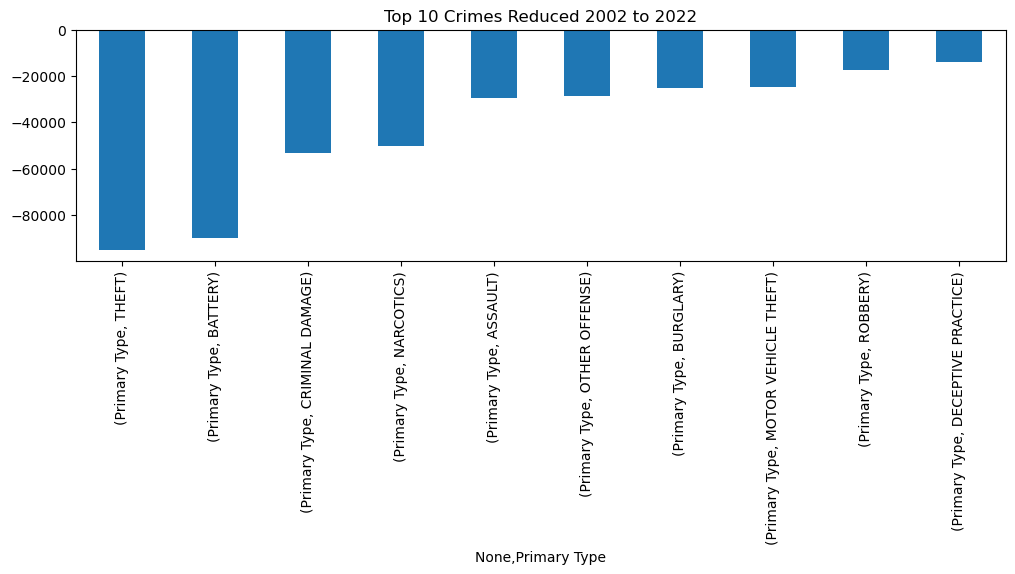

In [43]:
ax = top_drop10.plot.bar(title = 'Top 10 Crimes Reduced 2002 to 2022')

4) Comparing Months:

* What months have the most crime? What months have the least?

* Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [50]:
#Resample the dataset to a monthly frequency
monthly_df = chrono_df.resample('M').count()
#annual_df.value_count('id')
monthly_df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-31,38118,38118,38118,38118,38118,38118,38118,38118,503,37853,37853
2001-02-28,33783,33783,33783,33783,33783,33783,33783,33783,186,33608,33608
2001-03-31,40563,40563,40563,40561,40563,40563,40563,40563,218,40339,40339
2001-04-30,40090,40090,40090,40090,40090,40090,40090,40090,264,39852,39852
2001-05-31,41835,41835,41835,41835,41835,41835,41835,41835,260,41580,41580
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,22973,22973,22973,22900,22973,22973,22973,22973,22973,22730,22730
2022-11-30,20523,20523,20523,20472,20523,20523,20523,20523,20523,20157,20157
2022-12-31,19492,19492,19492,19437,19492,19492,19492,19492,19492,18277,18277


<AxesSubplot: xlabel='Date'>

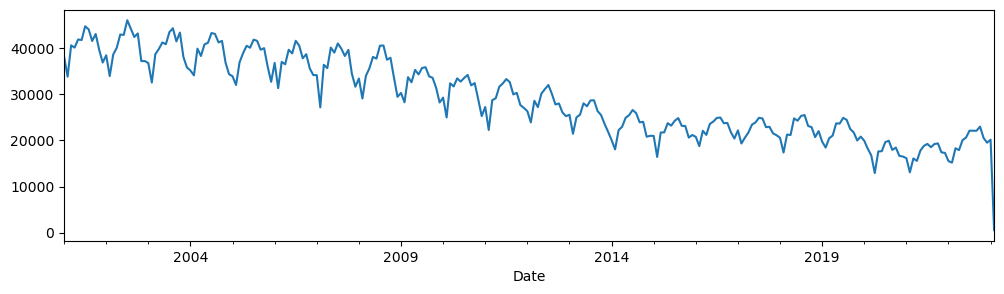

In [51]:
# Plot the monthly data using ID counts to see if there are any patterns...

monthly_df['ID'].plot()

In [ ]:
#There is definitely a seasonality pattern clear in this data.  Let's see if we can extract it...

indiv_crimes = chrono_df.groupby('Primary Type').resample('Y').count()
indiv_crimes


In [59]:
# Use subplots to look into the various crimes...
# plot_crime_m = crimes_unstacked.resample('M').sum()
# plot_crime_m

month_temp_df = chrono_df.groupby('Primary Type').resample('M').count()
month_temp_df

ID  Primary Type  Description  \
Primary Type      Date                                         
ARSON             2001-01-31   67            67           67   
                  2001-02-28   57            57           57   
                  2001-03-31   93            93           93   
                  2001-04-30   89            89           89   
                  2001-05-31   94            94           94   
...                           ...           ...          ...   
WEAPONS VIOLATION 2022-10-31  732           732          732   
                  2022-11-30  596           596          596   
                  2022-12-31  541           541          541   
                  2023-01-31  740           740          740   
                  2023-02-28   16            16           16   

                              Location Description  Arrest  Domestic  Beat  \
Primary Type      Date                                                       
ARSON             2001-01-31                    67      67        67    67   
                  2001-02-28                    57      57        57    57   
                  2001-03-31                    93      93        93    93   
                  2001-04-30                    89      89        89    89   
                  2001-05-31                    94      94        94    94   
...                                            ...     ...       ...   ...   
WEAPONS VIOLATION 2022-10-31                   732     732       732   732   
                  2022-11-30                   596     596       596   596   
                  2022-12-31                   541     541       541   541   
                  2023-01-31                   740     740       740   740   
                  2023-02-28                    16      16        16    16   

                              District  Ward  Latitude  Longitude  
Primary Type      Date                                             
ARSON             2001-01-31        67     0        65         65  
                  2001-02-28        57     0        57         57  
                  2001-03-31        93     0        93         93  
                  2001-04-30        89     0        88         88  
                  2001-05-31        94     0        94         94  
...                                ...   ...       ...        ...  
WEAPONS VIOLATION 2022-10-31       732   732       732        732  
                  2022-11-30       596   596       595        595  
                  2022-12-31       541   541       539        539  
                  2023-01-31       740   740       740        740  
                  2023-02-28        16    16        16         16  

[8654 rows x 11 columns]

In [60]:
month_crimes_df = month_temp_df.drop(columns=['ID', 'Description',
                                       'Location Description', 'Arrest', 
                                       'Domestic', 'Beat', 'District', 'Ward',
                                       'Latitude', 'Longitude'])
month_unstacked = month_crimes_df.unstack(level=0)
month_unstacked.name = "Crimes by Month"
month_unstacked

Primary Type                             \
Primary Type        ARSON  ASSAULT  BATTERY BURGLARY   
Date                                                   
2001-01-31          67.00 2,123.00 6,527.00 1,934.00   
2001-02-28          57.00 2,029.00 6,040.00 1,666.00   
2001-03-31          93.00 2,824.00 7,662.00 1,832.00   
2001-04-30          89.00 2,746.00 8,328.00 1,932.00   
2001-05-31          94.00 2,903.00 8,887.00 1,997.00   
...                   ...      ...      ...      ...   
2022-10-31          40.00 1,834.00 3,491.00   688.00   
2022-11-30          30.00 1,651.00 3,073.00   678.00   
2022-12-31          33.00 1,559.00 2,999.00   686.00   
2023-01-31          43.00 1,668.00 3,140.00   662.00   
2023-02-28           1.00    45.00   100.00    15.00   

                                                                    \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Date                                                                 
2001-01-31                                 NaN              162.00   
2001-02-28                                 NaN              134.00   
2001-03-31                                 NaN              149.00   
2001-04-30                                 NaN              132.00   
2001-05-31                                1.00              155.00   
...                                        ...                 ...   
2022-10-31                               10.00                 NaN   
2022-11-30                               18.00                 NaN   
2022-12-31                               12.00                 NaN   
2023-01-31                               20.00                 NaN   
2023-02-28                                1.00                 NaN   

                                                                        \
Primary Type CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Date                                                                     
2001-01-31          3,966.00                    4.00          1,192.00   
2001-02-28          3,665.00                    1.00          1,063.00   
2001-03-31          4,616.00                    4.00          1,141.00   
2001-04-30          4,922.00                    2.00          1,133.00   
2001-05-31          4,756.00                    2.00          1,067.00   
...                      ...                     ...               ...   
2022-10-31          2,832.00                  163.00            372.00   
2022-11-30          2,454.00                  107.00            329.00   
2022-12-31          2,256.00                   86.00            339.00   
2023-01-31          2,361.00                  105.00            377.00   
2023-02-28             47.00                    7.00             13.00   

                                                                     \
Primary Type DECEPTIVE PRACTICE DOMESTIC VIOLENCE GAMBLING HOMICIDE   
Date                                                                  
2001-01-31             1,397.00              1.00    44.00    42.00   
2001-02-28             1,161.00               NaN    37.00    27.00   
2001-03-31             1,313.00               NaN    55.00    37.00   
2001-04-30             1,199.00               NaN    79.00    59.00   
2001-05-31             1,259.00               NaN    94.00    42.00   
...                         ...               ...      ...      ...   
2022-10-31             1,468.00               NaN     0.00    64.00   
2022-11-30             1,323.00               NaN     0.00    56.00   
2022-12-31             1,271.00               NaN     0.00    58.00   
2023-01-31             1,077.00               NaN     1.00    44.00   
2023-02-28                40.00               NaN      NaN     2.00   

                                                                              \
Primary Type HUMAN TRAFFICKING INTERFERENCE WITH PUBLIC OFFICER INTIMIDATION   
Date                                                   

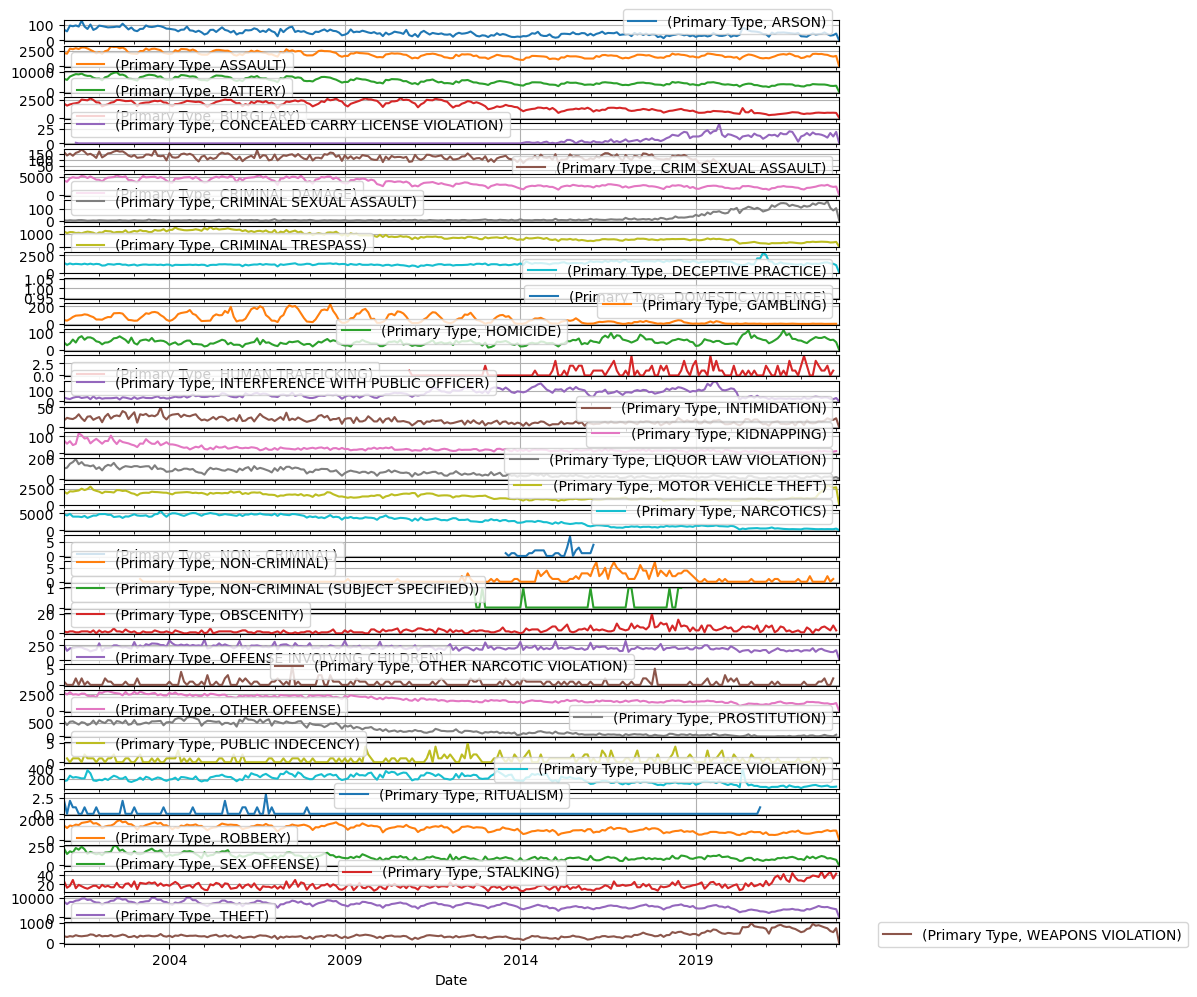

In [62]:
month_unstacked.plot(subplots=True,figsize=(10,12),grid=True);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)